In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


In [3]:
cleaned_dataset = pd.read_csv('../data/feature-engineered/feature_engineered_youtube_data.csv')
cleaned_dataset

,video_id,category_id,country,tags,definition,channel_id,channel_title,logged_at_initial,view_count_initial,like_count_initial,...,like_count_difference,avg_view_diff_per_category,avg_likes_diff_per_category,channel_authority,channel_avg_views,channel_growth_potential,channel_virality_score,log_channel_subs,relative_views_to_category,relative_likes_to_category
0,__1VyK2eQp8,22.0,unknown,unknown,hd,UCQHNLiqOCSiHgiLnIqADqCw,동그람이,2025-08-01 15:01:29,53.0,3.0,...,26.0,760.531441,34.178829,9.341456,64.940268,606.636683,87.262807,9.341456,972.230376,0.265542
1,__2_hnYMSsw,22.0,unknown,unknown,hd,UCy3LY7AfHxsmbbR7-26UDTQ,JamiesVlog2.0,2025-08-03 07:01:27,3.0,2.0,...,0.0,760.531441,34.178829,4.882802,111.742424,545.616124,23.841755,4.882802,19.368865,0.138799
2,__2mImszS_8,27.0,GB,unknown,hd,UCTa4-LmkT71W167cmkj-grA,Craig Miles,2025-08-02 02:01:32,2.0,0.0,...,0.0,359.859938,15.439753,5.662960,366.295139,2074.314896,32.069121,5.662960,292.337799,0.344467
3,__3IzcDWTZ8,24.0,unknown,unknown,hd,UCTbweMHZw2Z9uCe-OJQ9CXw,Reshal Dmello,2025-08-03 04:01:29,1.0,0.0,...,0.0,2744.971185,64.371586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,__GsVCzqwZo,24.0,IN,"horror short film,urdu horror story,scary tree...",hd,UCuQ0QMMN3OLlh9o1U_8Yllw,Semab Ai Story,2025-08-02 23:01:26,16.0,0.0,...,0.0,2744.971185,64.371586,3.970292,350.811321,1392.823350,15.763218,3.970292,6.771011,0.060734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25343,zzxEemc5DwI,23.0,IN,unknown,hd,UC2o-22oXfxFSwWeSL8sR4HA,MGworld_01,2025-08-01 10:02:11,105.0,3.0,...,2.0,1538.560000,106.478667,7.415175,487.723660,3616.556347,54.984822,7.415175,526.195147,0.068992
25344,ZZYJ43I_SBA,24.0,US,unknown,hd,UC26p3I1nr9F8G2WboH1SfTA,Joy of Coding,2025-08-01 04:02:02,765.0,0.0,...,0.0,2744.971185,64.371586,7.155396,99.373146,711.054241,51.199696,7.155396,46.357733,0.109457
25345,zZylRLDi7gU,22.0,BD,unknown,hd,UCoRqLUOPKq5Xu3qSjJjqKCw,Noob Slayer YT,2025-08-02 15:01:55,25.0,1.0,...,2.0,760.531441,34.178829,2.197225,365.777778,803.695923,4.827796,2.197225,4.322868,0.062459
25346,ZZZJkNM09qc,22.0,unknown,unknown,hd,UCjV27cMOn9LSfjn9L7Jju4Q,HQB8 Sourcing agent,2025-08-01 22:01:53,2.0,0.0,...,0.0,760.531441,34.178829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
cleaned_dataset.columns

Index(['video_id', 'category_id', 'country', 'tags', 'definition',
       'channel_id', 'channel_title', 'logged_at_initial',
       'view_count_initial', 'like_count_initial', 'comment_count_initial',
       'c_view_count_initial', 'c_subscriber_count_initial', 'logged_at_final',
       'view_count_final', 'like_count_final', 'comment_count_final',
       'c_view_count_final', 'c_subscriber_count_final', 'published_year',
       'published_month', 'published_day_of_week', 'published_time',
       'view_count_difference', 'like_count_difference',
       'avg_view_diff_per_category', 'avg_likes_diff_per_category',
       'channel_authority', 'channel_avg_views', 'channel_growth_potential',
       'channel_virality_score', 'log_channel_subs',
       'relative_views_to_category', 'relative_likes_to_category'],
      dtype='object')

In [5]:
cleaned_dataset = cleaned_dataset.drop(
    ['video_id', 'tags', 'channel_id', 'channel_title', 'comment_count_initial',
     'c_subscriber_count_initial', 'c_view_count_final', 'c_subscriber_count_final',
     'view_count_difference','like_count_difference','comment_count_final'], 
    axis=1,
    errors='ignore'  # This avoids crashing if a column is missing
)


In [6]:
cleaned_dataset.columns

Index(['category_id', 'country', 'definition', 'logged_at_initial',
       'view_count_initial', 'like_count_initial', 'c_view_count_initial',
       'logged_at_final', 'view_count_final', 'like_count_final',
       'published_year', 'published_month', 'published_day_of_week',
       'published_time', 'avg_view_diff_per_category',
       'avg_likes_diff_per_category', 'channel_authority', 'channel_avg_views',
       'channel_growth_potential', 'channel_virality_score',
       'log_channel_subs', 'relative_views_to_category',
       'relative_likes_to_category'],
      dtype='object')

In [7]:
cleaned_dataset.dtypes

category_id                    float64
country                         object
definition                      object
logged_at_initial               object
view_count_initial             float64
like_count_initial             float64
c_view_count_initial           float64
logged_at_final                 object
view_count_final               float64
like_count_final               float64
published_year                   int64
published_month                  int64
published_day_of_week           object
published_time                  object
avg_view_diff_per_category     float64
avg_likes_diff_per_category    float64
channel_authority              float64
channel_avg_views              float64
channel_growth_potential       float64
channel_virality_score         float64
log_channel_subs               float64
relative_views_to_category     float64
relative_likes_to_category     float64
dtype: object

In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib

# Define target columns to exclude
target_columns = [
    'like_count_initial',
    'like_count_final',
    'view_count_initial',
    'view_count_final'
]

# Define additional columns to exclude from scaling
exclude_columns = target_columns + ['category_id','published_year','published_month',]

# Keep only numeric columns
numeric_cols = cleaned_dataset.select_dtypes(include='number').columns.tolist()

# Determine columns to scale: numeric AND not in exclude list
scale_columns = [col for col in numeric_cols if col not in exclude_columns and col != 'category_id']

# Apply standard scaling only to selected columns
scaler = StandardScaler()
scaled_values = scaler.fit_transform(cleaned_dataset[scale_columns])

# Create scaled DataFrame
scaled_df = pd.DataFrame(scaled_values, columns=scale_columns, index=cleaned_dataset.index)

# Combine with unscaled columns
unscaled_df = cleaned_dataset.drop(columns=scale_columns)
final_df = pd.concat([unscaled_df, scaled_df], axis=1)

# Export the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [9]:
cleaned_dataset

,category_id,country,definition,logged_at_initial,view_count_initial,like_count_initial,c_view_count_initial,logged_at_final,view_count_final,like_count_final,...,published_time,avg_view_diff_per_category,avg_likes_diff_per_category,channel_authority,channel_avg_views,channel_growth_potential,channel_virality_score,log_channel_subs,relative_views_to_category,relative_likes_to_category
0,22.0,unknown,hd,2025-08-01 15:01:29,53.0,3.0,740384.0,2025-08-01 21:00:04,505.0,29.0,...,14:30:53,760.531441,34.178829,9.341456,64.940268,606.636683,87.262807,9.341456,972.230376,0.265542
1,22.0,unknown,hd,2025-08-03 07:01:27,3.0,2.0,14750.0,2025-08-03 08:00:04,3.0,2.0,...,06:44:45,760.531441,34.178829,4.882802,111.742424,545.616124,23.841755,4.882802,19.368865,0.138799
2,27.0,GB,hd,2025-08-02 02:01:32,2.0,0.0,105493.0,2025-08-02 03:00:04,2.0,0.0,...,02:00:06,359.859938,15.439753,5.662960,366.295139,2074.314896,32.069121,5.662960,292.337799,0.344467
3,24.0,unknown,hd,2025-08-03 04:01:29,1.0,0.0,0.0,2025-08-03 05:00:04,1.0,0.0,...,03:12:48,2744.971185,64.371586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,24.0,IN,hd,2025-08-02 23:01:26,16.0,0.0,18593.0,2025-08-03 00:00:05,2.0,0.0,...,22:33:57,2744.971185,64.371586,3.970292,350.811321,1392.823350,15.763218,3.970292,6.771011,0.060734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25343,23.0,IN,hd,2025-08-01 10:02:11,105.0,3.0,810109.0,2025-08-01 11:00:37,196.0,5.0,...,09:48:09,1538.560000,106.478667,7.415175,487.723660,3616.556347,54.984822,7.415175,526.195147,0.068992
25344,24.0,US,hd,2025-08-01 04:02:02,765.0,0.0,127297.0,2025-08-01 05:00:35,765.0,0.0,...,03:38:35,2744.971185,64.371586,7.155396,99.373146,711.054241,51.199696,7.155396,46.357733,0.109457
25345,22.0,BD,hd,2025-08-02 15:01:55,25.0,1.0,3292.0,2025-08-02 21:00:35,36.0,3.0,...,14:19:10,760.531441,34.178829,2.197225,365.777778,803.695923,4.827796,2.197225,4.322868,0.062459
25346,22.0,unknown,hd,2025-08-01 22:01:53,2.0,0.0,0.0,2025-08-01 23:00:34,2.0,0.0,...,21:40:44,760.531441,34.178829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
cleaned_dataset.shape

(25348, 23)

In [11]:
correlation_matrix = cleaned_dataset.corr(numeric_only=True).abs()
correlation_matrix

,category_id,view_count_initial,like_count_initial,c_view_count_initial,view_count_final,like_count_final,published_year,published_month,avg_view_diff_per_category,avg_likes_diff_per_category,channel_authority,channel_avg_views,channel_growth_potential,channel_virality_score,log_channel_subs,relative_views_to_category,relative_likes_to_category
category_id,1.000000,0.005803,0.004117,0.034797,0.000834,0.002774,NaN,0.001602,0.055065,0.016756,0.004689,0.012229,0.025685,0.016231,0.004689,0.037576,0.028602
view_count_initial,0.005803,1.000000,0.705163,0.050523,0.801340,0.612982,NaN,0.011526,0.095678,0.045389,0.124128,0.000544,0.038512,0.148481,0.124128,0.041470,0.034021
like_count_initial,0.004117,0.705163,1.000000,0.037504,0.593075,0.927855,NaN,0.007766,0.092123,0.049158,0.123069,0.007834,0.023933,0.147719,0.123069,0.023603,0.031858
c_view_count_initial,0.034797,0.050523,0.037504,1.000000,0.052886,0.054024,NaN,0.019341,0.012577,0.024725,0.247436,0.038768,0.181685,0.350731,0.247436,0.804725,0.120119
view_count_final,0.000834,0.801340,0.593075,0.052886,1.000000,0.562035,NaN,0.019096,0.105815,0.057637,0.134745,0.001024,0.046175,0.157399,0.134745,0.044892,0.033238
like_count_final,0.002774,0.612982,0.927855,0.054024,0.562035,1.000000,NaN,0.011141,0.085310,0.056676,0.159202,0.000414,0.050048,0.190830,0.159202,0.041257,0.048634
published_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_month,0.001602,0.011526,0.007766,0.019341,0.019096,0.011141,NaN,1.000000,0.010216,0.008040,0.019625,0.000740,0.013609,0.023164,0.019625,0.011633,0.000516
avg_view_diff_per_category,0.055065,0.095678,0.092123,0.012577,0.105815,0.085310,NaN,0.010216,1.000000,0.633281,0.164155,0.033500,0.003481,0.144555,0.164155,0.038270,0.274786
avg_likes_diff_per_category,0.016756,0.045389,0.049158,0.024725,0.057637,0.056676,NaN,0.008040,0.633281,1.000000,0.162440,0.018086,0.022655,0.146743,0.162440,0.028635,0.495418


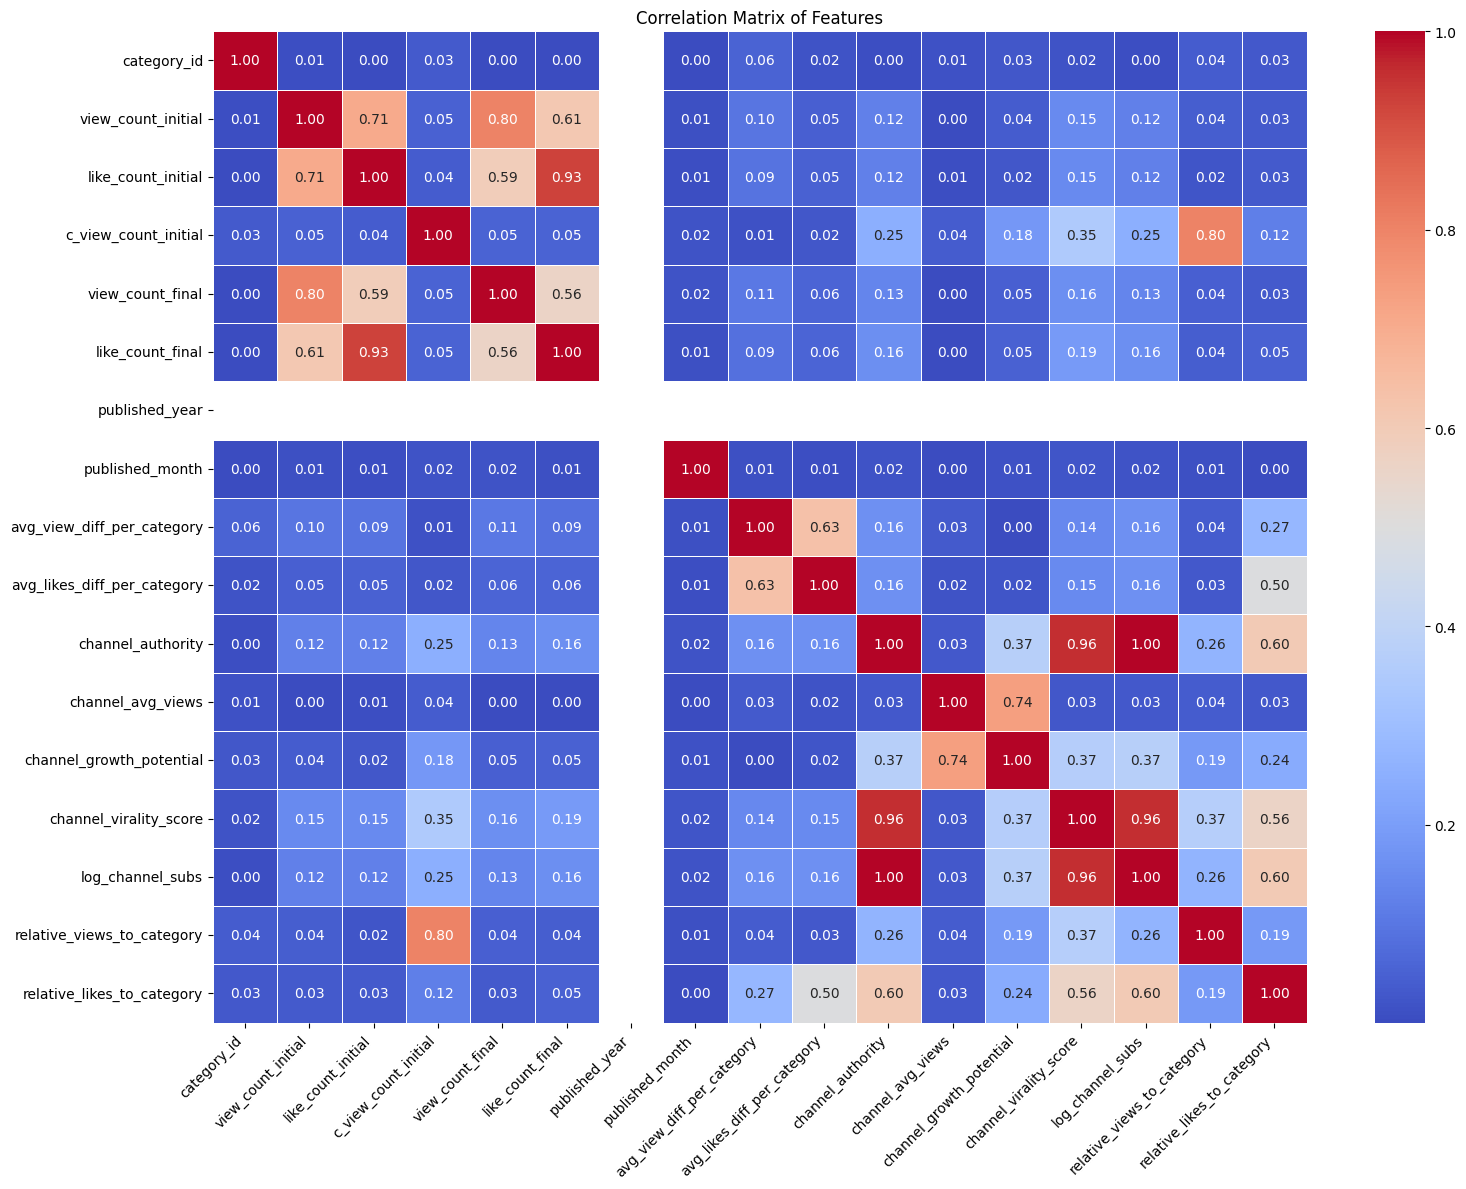

In [12]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
# Select upper triangle of correlation matrix to avoid duplicates
upper_tri = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find features with correlation greater than 0.9
high_corr_pairs = [
    (column, row, upper_tri.loc[row, column])
    for column in upper_tri.columns
    for row in upper_tri.index
    if upper_tri.loc[row, column] > 0.9
]

# Sort by correlation strength (optional)
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: -x[2])
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} ↔ {feature2}: {corr_value:.2f}")

log_channel_subs ↔ channel_authority: 1.00
channel_virality_score ↔ channel_authority: 0.96
log_channel_subs ↔ channel_virality_score: 0.96
like_count_final ↔ like_count_initial: 0.93


In [14]:
columns_to_drop = [
   'channel_authority'
]

cleaned_dataset.drop(columns=columns_to_drop, inplace=True)


In [37]:
cleaned_dataset

,category_id,country,definition,logged_at_initial,view_count_initial,like_count_initial,c_view_count_initial,logged_at_final,view_count_final,like_count_final,...,published_day_of_week,published_time,avg_view_diff_per_category,avg_likes_diff_per_category,channel_avg_views,channel_growth_potential,channel_virality_score,log_channel_subs,relative_views_to_category,relative_likes_to_category
0,22.0,unknown,hd,2025-08-01 15:01:29,53.0,3.0,740384.0,2025-08-01 21:00:04,505.0,29.0,...,Friday,14:30:53,760.531441,34.178829,64.940268,606.636683,87.262807,9.341456,972.230376,0.265542
1,22.0,unknown,hd,2025-08-03 07:01:27,3.0,2.0,14750.0,2025-08-03 08:00:04,3.0,2.0,...,Sunday,06:44:45,760.531441,34.178829,111.742424,545.616124,23.841755,4.882802,19.368865,0.138799
2,27.0,GB,hd,2025-08-02 02:01:32,2.0,0.0,105493.0,2025-08-02 03:00:04,2.0,0.0,...,Saturday,02:00:06,359.859938,15.439753,366.295139,2074.314896,32.069121,5.662960,292.337799,0.344467
3,24.0,unknown,hd,2025-08-03 04:01:29,1.0,0.0,0.0,2025-08-03 05:00:04,1.0,0.0,...,Sunday,03:12:48,2744.971185,64.371586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,24.0,IN,hd,2025-08-02 23:01:26,16.0,0.0,18593.0,2025-08-03 00:00:05,2.0,0.0,...,Saturday,22:33:57,2744.971185,64.371586,350.811321,1392.823350,15.763218,3.970292,6.771011,0.060734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25343,23.0,IN,hd,2025-08-01 10:02:11,105.0,3.0,810109.0,2025-08-01 11:00:37,196.0,5.0,...,Friday,09:48:09,1538.560000,106.478667,487.723660,3616.556347,54.984822,7.415175,526.195147,0.068992
25344,24.0,US,hd,2025-08-01 04:02:02,765.0,0.0,127297.0,2025-08-01 05:00:35,765.0,0.0,...,Friday,03:38:35,2744.971185,64.371586,99.373146,711.054241,51.199696,7.155396,46.357733,0.109457
25345,22.0,BD,hd,2025-08-02 15:01:55,25.0,1.0,3292.0,2025-08-02 21:00:35,36.0,3.0,...,Saturday,14:19:10,760.531441,34.178829,365.777778,803.695923,4.827796,2.197225,4.322868,0.062459
25346,22.0,unknown,hd,2025-08-01 22:01:53,2.0,0.0,0.0,2025-08-01 23:00:34,2.0,0.0,...,Friday,21:40:44,760.531441,34.178829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
cleaned_dataset['logged_at_initial_hour'] = pd.to_datetime(cleaned_dataset['logged_at_initial']).dt.hour
cleaned_dataset['logged_at_final_hour'] = pd.to_datetime(cleaned_dataset['logged_at_final']).dt.hour


In [39]:
cleaned_dataset

,category_id,country,definition,logged_at_initial,view_count_initial,like_count_initial,c_view_count_initial,logged_at_final,view_count_final,like_count_final,...,avg_view_diff_per_category,avg_likes_diff_per_category,channel_avg_views,channel_growth_potential,channel_virality_score,log_channel_subs,relative_views_to_category,relative_likes_to_category,logged_at_initial_hour,logged_at_final_hour
0,22.0,unknown,hd,2025-08-01 15:01:29,53.0,3.0,740384.0,2025-08-01 21:00:04,505.0,29.0,...,760.531441,34.178829,64.940268,606.636683,87.262807,9.341456,972.230376,0.265542,15.0,21.0
1,22.0,unknown,hd,2025-08-03 07:01:27,3.0,2.0,14750.0,2025-08-03 08:00:04,3.0,2.0,...,760.531441,34.178829,111.742424,545.616124,23.841755,4.882802,19.368865,0.138799,7.0,8.0
2,27.0,GB,hd,2025-08-02 02:01:32,2.0,0.0,105493.0,2025-08-02 03:00:04,2.0,0.0,...,359.859938,15.439753,366.295139,2074.314896,32.069121,5.662960,292.337799,0.344467,2.0,3.0
3,24.0,unknown,hd,2025-08-03 04:01:29,1.0,0.0,0.0,2025-08-03 05:00:04,1.0,0.0,...,2744.971185,64.371586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,5.0
4,24.0,IN,hd,2025-08-02 23:01:26,16.0,0.0,18593.0,2025-08-03 00:00:05,2.0,0.0,...,2744.971185,64.371586,350.811321,1392.823350,15.763218,3.970292,6.771011,0.060734,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25343,23.0,IN,hd,2025-08-01 10:02:11,105.0,3.0,810109.0,2025-08-01 11:00:37,196.0,5.0,...,1538.560000,106.478667,487.723660,3616.556347,54.984822,7.415175,526.195147,0.068992,10.0,11.0
25344,24.0,US,hd,2025-08-01 04:02:02,765.0,0.0,127297.0,2025-08-01 05:00:35,765.0,0.0,...,2744.971185,64.371586,99.373146,711.054241,51.199696,7.155396,46.357733,0.109457,4.0,5.0
25345,22.0,BD,hd,2025-08-02 15:01:55,25.0,1.0,3292.0,2025-08-02 21:00:35,36.0,3.0,...,760.531441,34.178829,365.777778,803.695923,4.827796,2.197225,4.322868,0.062459,15.0,21.0
25346,22.0,unknown,hd,2025-08-01 22:01:53,2.0,0.0,0.0,2025-08-01 23:00:34,2.0,0.0,...,760.531441,34.178829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.0,23.0


In [40]:
cleaned_dataset.dtypes

category_id                    float64
country                         object
definition                      object
logged_at_initial               object
view_count_initial             float64
like_count_initial             float64
c_view_count_initial           float64
logged_at_final                 object
view_count_final               float64
like_count_final               float64
published_year                   int64
published_month                  int64
published_day_of_week           object
published_time                  object
avg_view_diff_per_category     float64
avg_likes_diff_per_category    float64
channel_avg_views              float64
channel_growth_potential       float64
channel_virality_score         float64
log_channel_subs               float64
relative_views_to_category     float64
relative_likes_to_category     float64
logged_at_initial_hour         float64
logged_at_final_hour           float64
dtype: object

In [45]:
cleaned_dataset

,category_id,country,definition,logged_at_initial,view_count_initial,like_count_initial,c_view_count_initial,logged_at_final,view_count_final,like_count_final,...,avg_view_diff_per_category,avg_likes_diff_per_category,channel_avg_views,channel_growth_potential,channel_virality_score,log_channel_subs,relative_views_to_category,relative_likes_to_category,logged_at_initial_hour,logged_at_final_hour
0,22.0,unknown,hd,2025-08-01 15:01:29,53.0,3.0,740384.0,2025-08-01 21:00:04,505.0,29.0,...,760.531441,34.178829,64.940268,606.636683,87.262807,9.341456,972.230376,0.265542,15.0,21.0
1,22.0,unknown,hd,2025-08-03 07:01:27,3.0,2.0,14750.0,2025-08-03 08:00:04,3.0,2.0,...,760.531441,34.178829,111.742424,545.616124,23.841755,4.882802,19.368865,0.138799,7.0,8.0
2,27.0,GB,hd,2025-08-02 02:01:32,2.0,0.0,105493.0,2025-08-02 03:00:04,2.0,0.0,...,359.859938,15.439753,366.295139,2074.314896,32.069121,5.662960,292.337799,0.344467,2.0,3.0
3,24.0,unknown,hd,2025-08-03 04:01:29,1.0,0.0,0.0,2025-08-03 05:00:04,1.0,0.0,...,2744.971185,64.371586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,5.0
4,24.0,IN,hd,2025-08-02 23:01:26,16.0,0.0,18593.0,2025-08-03 00:00:05,2.0,0.0,...,2744.971185,64.371586,350.811321,1392.823350,15.763218,3.970292,6.771011,0.060734,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25343,23.0,IN,hd,2025-08-01 10:02:11,105.0,3.0,810109.0,2025-08-01 11:00:37,196.0,5.0,...,1538.560000,106.478667,487.723660,3616.556347,54.984822,7.415175,526.195147,0.068992,10.0,11.0
25344,24.0,US,hd,2025-08-01 04:02:02,765.0,0.0,127297.0,2025-08-01 05:00:35,765.0,0.0,...,2744.971185,64.371586,99.373146,711.054241,51.199696,7.155396,46.357733,0.109457,4.0,5.0
25345,22.0,BD,hd,2025-08-02 15:01:55,25.0,1.0,3292.0,2025-08-02 21:00:35,36.0,3.0,...,760.531441,34.178829,365.777778,803.695923,4.827796,2.197225,4.322868,0.062459,15.0,21.0
25346,22.0,unknown,hd,2025-08-01 22:01:53,2.0,0.0,0.0,2025-08-01 23:00:34,2.0,0.0,...,760.531441,34.178829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.0,23.0


In [51]:
cleaned_dataset.to_csv('../data/pre-processed/preprocessed_youtube_data.csv', index=False)